# Logistic Regression for Credit Risk Modeling

# Import Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cr_loan_clean = pd.read_csv('cr_loan_nout_nmiss.xls')

In [4]:
cr_loan_clean.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2,VENTURE,A,2500,7.14,1,0.25,N,2


# Basic Logistic Regression

We want to create a model using only one feature (loan interest rate)

In [5]:
X = cr_loan_clean[['loan_int_rate']]
Y = cr_loan_clean[['loan_status']]

Create and fit the logistic regression model

In [6]:
from sklearn.linear_model import LogisticRegression
clf_single = LogisticRegression(random_state=0).fit(X, np.ravel(Y))

C:\Users\veron\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


We now take a look at the gregression parameters, the intercept and coefficient

In [7]:
clf_single.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [8]:
clf_single.intercept_

array([-4.43672624])

In [9]:
clf_single.coef_

array([[0.26982671]])

### Multivariate Regression

We now create a multivariate regression using the loan interest rate and the employment length as features

In [10]:
X_multi = cr_loan_clean[['loan_int_rate','person_emp_length']]

In [11]:
y = cr_loan_clean[['loan_status']]

We now create and fit the model

In [12]:
clf_multi = LogisticRegression(solver='lbfgs').fit(X_multi, np.ravel(Y))

We print the intercept and the coefficients

In [13]:
clf_multi.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [14]:
clf_multi.coef_

array([[ 0.2712521 , -0.05350754]])

Now we want to create another logistic regression with three features: interest rate, employment length, and income

In [15]:
X = cr_loan_clean[['loan_int_rate','person_emp_length','person_income']]

In [16]:
y = cr_loan_clean[['loan_status']]

Train-test split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

In [19]:
clf_logistic = LogisticRegression(solver='lbfgs').fit(X, np.ravel(y))

Print the models coefficients

In [20]:
clf_logistic.coef_

array([[ 2.88406433e-01, -2.00190285e-02, -2.12887510e-05]])

### One-hot encoding credit data

Create two data sets for numeric and non-numeric

In [21]:
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])

In [22]:
cred_str.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,OWN,EDUCATION,B,N
1,MORTGAGE,MEDICAL,C,N
2,RENT,MEDICAL,C,N
3,RENT,MEDICAL,C,Y
4,OWN,VENTURE,A,N


Create a dummy dataframe for non-numeric data

In [23]:
cred_str_onehot = pd.get_dummies(cred_str)

In [24]:
cred_str_onehot.head()

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0


Concatenate the data

In [25]:
cr_loan_prep = pd.concat([cred_num,cred_str_onehot], axis = 1)

In [26]:
cr_loan_prep.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,21,9600,5,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
1,25,9600,1,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
2,23,65500,4,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
3,24,54400,8,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
4,21,9900,2,2500,7.14,1,0.25,2,0,0,...,1,1,0,0,0,0,0,0,1,0


In [27]:
features = list(cr_loan_prep.columns)
features.remove('loan_status')

In [28]:
X = cr_loan_prep[features]
y = cr_loan_prep[['loan_status']]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

### Predicting Probability of Default

In [30]:
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

In [31]:
preds = clf_logistic.predict_proba(X_test)

In [32]:
preds[:5]

array([[0.5542214 , 0.4457786 ],
       [0.77655347, 0.22344653],
       [0.71144174, 0.28855826],
       [0.83064247, 0.16935753],
       [0.88581803, 0.11418197]])

### Default Classification Reporting

Create a dataframe for the probabilities of default

In [33]:
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

Reassign loan status based on the threshold

In [34]:
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.50 else 0)

Print the row counts for each loan status

In [35]:
preds_df['loan_status'].value_counts()

0    11175
1      609
Name: loan_status, dtype: int64

Print the classification report

In [36]:
target_names = ['Non-Default', 'Default']

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.81      0.98      0.89      9198
     Default       0.71      0.17      0.27      2586

   micro avg       0.80      0.80      0.80     11784
   macro avg       0.76      0.57      0.58     11784
weighted avg       0.79      0.80      0.75     11784



### Model Evaluation

Create a predictions and store them in a variable

In [38]:
preds = clf_logistic.predict(X_test)

The Metrics to evaluate the model: <br />
Classification Accuracy. <br />
Log Loss. <br />
Area Under ROC Curve. <br />
Confusion Matrix. <br />
Classification Report. <br />

#### Accuracy score

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.8025288526816021

#### Log Loss

In [40]:
from sklearn.metrics import log_loss

In [41]:
log_loss(y_test, preds)

6.8204236762141415

#### Area Under ROC Curve

In [42]:
from sklearn import metrics

Compute the predited probabilities

In [43]:
y_proba = clf_logistic.predict_proba(X_test)
y_proba = y_proba[:,1]

In [44]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba)

In [45]:
fpr

array([0.00000000e+00, 1.08719287e-04, 1.08719287e-04, ...,
       9.95542509e-01, 9.95542509e-01, 1.00000000e+00])

In [46]:
tpr

array([0.00000000e+00, 0.00000000e+00, 7.73395205e-04, ...,
       9.99613302e-01, 1.00000000e+00, 1.00000000e+00])

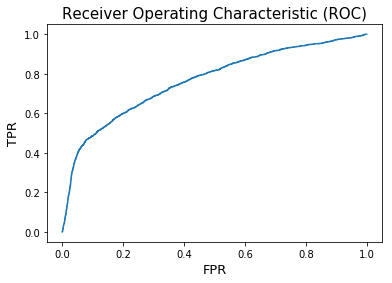

In [47]:
%matplotlib inline
plt.plot(fpr,tpr)
plt.title('Receiver Operating Characteristic (ROC)', fontsize = 15)
plt.xlabel('FPR', fontsize = 13)
plt.ylabel('TPR', fontsize = 13)
plt.show()

Let's compute the Area under the ROC curve

In [48]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds)

0.5744004421419162

According to the ROC area under the curve, the model has (a little) discrimination capacity

#### Confusion Matrix

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
confusion_matrix(y_test, preds)

array([[9023,  175],
       [2152,  434]], dtype=int64)

In [51]:
matrix = pd.DataFrame({'Actual Positive':list(confusion_matrix(y_test, preds)[0,:]), 'Actual Negative' : list(confusion_matrix(y_test, preds)[1,:])})
matrix.index = ['Predicted Positive','Predicted Negative']

In [52]:
matrix

,Actual Positive,Actual Negative
Predicted Positive,9023,2152
Predicted Negative,175,434


Compute precision, recall and F1 score

In [53]:
from sklearn.metrics import precision_recall_fscore_support
metrics = precision_recall_fscore_support(y_test, preds)

In [54]:
precision = metrics[0][0]
precision

0.8074272930648769

In [55]:
Recall = metrics[1][0]
Recall

0.9809741248097412

In [56]:
F_score = metrics[2][0]
F_score

0.8857801992833652